# CNM 1250 Final Project
## Importing and Plotting Instantaneous Streamflow Data from USGS
### Dennis Romero
### dromero166@cnm.edu
### Purpose:  Use Jupyter Notebook, Anaconda and Python to import data from a website and plot it

##Import Libraries/Packages

In [65]:
# Import Libraries
import urllib
import pandas
import numpy
import os

# Import instantaneous streamflow data from USGS database

In [68]:
## Ask User for Input

station_number = input('Please enter the USGS Station ID\t')
begin_date = input('Please enter a start date (YYYY-MM-DD):\t')
end_date = input('Please enter an end date (YYYY-MM-DD):\t')
folder = os.getcwd()

                 

Please enter the USGS Station ID	 09364010
Please enter a start date (YYYY-MM-DD):	 2010-01-01
Please enter an end date (YYYY-MM-DD):	 2019-12-31


In [70]:
## Recombine the parsed sections of the URL with the user input for the data query

linkPart1 = 'https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no='
linkPart2 = '&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd='\
'LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key='\
'NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date='
linkPart3 = '&end_date='
linkPart4 = '&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection'

link = (linkPart1 + station_number + linkPart2 + begin_date + linkPart3 + end_date + linkPart4)
print("Click here to see the USGS link you generated: \n",link)

Click here to see the USGS link you generated: 
 https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no=09364010&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key=NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date=2010-01-01&end_date=2019-12-31&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection


# Based on User Input, Create a URL input for the station

In [73]:


## Break up the standard USGS URL query for streamflow data at a gage

linkPart1 = 'https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no='
linkPart2 = '&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd='\
'LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key='\
'NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date='
linkPart3 = '&end_date='
linkPart4 = '&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection'

link = (linkPart1 + station_number + linkPart2 + begin_date + linkPart3 + end_date + linkPart4)
print("Click here to see the USGS link you generated: \n",link)

Click here to see the USGS link you generated: 
 https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no=09364010&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key=NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date=2010-01-01&end_date=2019-12-31&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection


In [75]:
## Download the data and process it for use in the hydrograph

USGS_webpage = urllib.request.urlopen(link)
downloaded_data = USGS_webpage.read()
str_data = downloaded_data.decode()
type(str_data)
f_str_data = str_data.split('\n')

date_flow = ''

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("USGS"):
        data = f_str_data[line][14:]
        columns = data.split('\t')
        rows = ','.join([columns[0],(columns[1])])
        date_flow += rows + '\n'
date_flow = date_flow.encode()

with open(folder+'/USGS_Data_for_' + station_number  + '.txt', 'wb') as text:
        text.write(date_flow)

filename = folder+'/USGS_Data_for_' + station_number  + '.txt'
columns = ['Date','Discharge (cfs)']
df = pandas.read_csv(filename,header=None,names=columns,parse_dates=[0])
df=df.set_index(['Date'])
df['Discharge (cfs)']=pandas.to_numeric(df['Discharge (cfs)'], errors='coerce')
df.tail()


,Discharge (cfs)
Date,
2019-12-27,236.0
2019-12-28,238.0
2019-12-29,221.0
2019-12-30,193.0
2019-12-31,172.0


#Plot the hydrograph

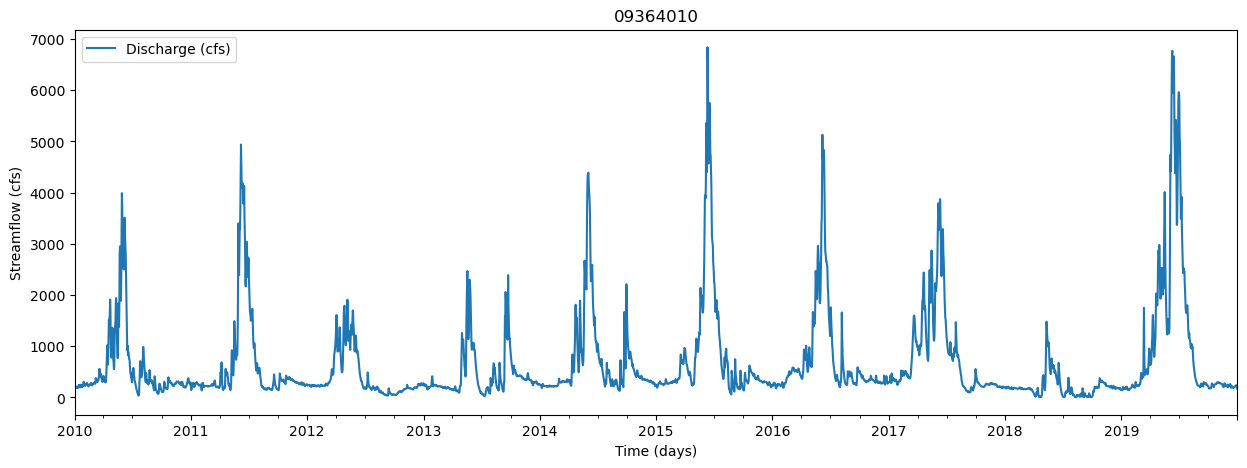

In [77]:
df.plot(figsize=(15,5), title= station_number, xlabel="Time (days)", ylabel="Streamflow (cfs)");